In [1]:
pip install Keras==2.1.5

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
#to fix the random seed
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
import random as rn
rn.seed(1)
import os
os.environ['PYTHONHASHSEED']=str(1)

In [2]:
#import the necessary package
import math
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam , SGD , RMSprop
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#read the data
apple =  pd.read_csv(r'C:\Users\S023938\Desktop\GAdat15\materials-Own\project\data.csv', header=0)
apple.head()

,Date,PX_OPEN,PX_LAST,PX_LOW,PX_HIGH,PX_BID,PX_ASK,PX_MID,PX_VOLUME,PX_TO_BOOK_RATIO,PE_RATIO,IS_EPS,CASH_RATIO,CUR_RATIO,QUICK_RATIO,AVERAGE_DIVIDEND_YIELD,PROF_MARGIN,OPER_MARGIN
0,31/10/2019,247.24,248.76,237.26,249.17,248.81,248.83,248.820,34790520,12.2149,20.9839,3.05,0.9512,1.5401,1.168,1.2060,21.371,24.3988
1,30/10/2019,244.76,243.26,241.21,245.30,243.28,243.30,243.290,31130522,11.9448,20.5199,3.05,0.9512,1.5401,1.168,1.2332,21.371,24.3988
2,29/10/2019,248.97,243.29,242.57,249.75,243.28,243.30,243.290,35709867,11.9463,20.5224,3.05,0.9512,1.5401,1.168,1.2331,21.371,24.3988
3,28/10/2019,247.42,249.05,246.72,249.25,249.05,249.06,249.055,24143241,12.2291,21.0083,3.05,0.9512,1.5401,1.168,1.2046,21.371,24.3988
4,25/10/2019,243.16,246.58,242.88,246.73,246.58,246.59,246.585,18369296,12.1078,20.8000,3.05,0.9512,1.5401,1.168,1.2166,21.371,24.3988


In [4]:
#check the rows and columns of data
print(apple.shape)

(2518, 18)


In [5]:
#the types of each column
apple.dtypes

Date                       object
PX_OPEN                   float64
PX_LAST                   float64
PX_LOW                    float64
PX_HIGH                   float64
PX_BID                    float64
PX_ASK                    float64
PX_MID                    float64
PX_VOLUME                   int64
PX_TO_BOOK_RATIO          float64
PE_RATIO                  float64
IS_EPS                    float64
CASH_RATIO                float64
CUR_RATIO                 float64
QUICK_RATIO               float64
AVERAGE_DIVIDEND_YIELD    float64
PROF_MARGIN               float64
OPER_MARGIN               float64
dtype: object

In [6]:
apple.describe()

,PX_OPEN,PX_LAST,PX_LOW,PX_HIGH,PX_BID,PX_ASK,PX_MID,PX_VOLUME,PX_TO_BOOK_RATIO,PE_RATIO,IS_EPS,CASH_RATIO,CUR_RATIO,QUICK_RATIO,AVERAGE_DIVIDEND_YIELD,PROF_MARGIN,OPER_MARGIN
count,2518.000000,2518.000000,2518.000000,2518.000000,2517.000000,2517.000000,2517.000000,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,106.342771,106.352621,105.364308,107.291426,106.372668,106.389536,106.381102,7.649227e+07,5.565310,15.591883,1.841105,0.924888,1.542474,1.136424,1.176670,22.199834,28.613822
std,53.212144,53.255136,52.791693,53.688553,53.242431,53.245604,53.244016,5.888254e+07,1.603206,3.092814,0.906796,0.350378,0.399864,0.363968,0.824817,2.326157,3.641065
min,26.835700,26.928600,26.510000,27.074300,26.928600,26.954300,26.941400,1.136204e+07,2.709700,9.322800,0.402900,0.395200,1.001700,0.668000,0.000000,18.405000,21.453700
25%,62.620750,62.768925,62.012475,63.474275,62.808600,62.810000,62.809300,3.205256e+07,4.625525,13.246125,1.187100,0.755800,1.283100,0.960800,0.000000,20.698900,26.048200
50%,97.325000,97.340000,96.484300,98.200000,97.344300,97.360000,97.350000,5.768829e+07,5.345500,15.527650,1.778600,0.863900,1.482450,1.072800,1.463750,21.895300,28.393600
75%,144.062500,143.997500,143.250000,144.865000,144.020000,144.030000,144.025000,1.046191e+08,6.022725,17.937625,2.340000,1.054700,1.678600,1.228800,1.815350,23.390800,30.428700
max,248.970000,249.050000,246.720000,249.750000,249.050000,249.060000,249.055000,4.702467e+08,12.229100,23.266000,4.220000,2.039300,2.742500,2.331400,2.774100,29.658600,39.258900


In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 18 columns):
Date                      2518 non-null object
PX_OPEN                   2518 non-null float64
PX_LAST                   2518 non-null float64
PX_LOW                    2518 non-null float64
PX_HIGH                   2518 non-null float64
PX_BID                    2517 non-null float64
PX_ASK                    2517 non-null float64
PX_MID                    2517 non-null float64
PX_VOLUME                 2518 non-null int64
PX_TO_BOOK_RATIO          2518 non-null float64
PE_RATIO                  2518 non-null float64
IS_EPS                    2518 non-null float64
CASH_RATIO                2518 non-null float64
CUR_RATIO                 2518 non-null float64
QUICK_RATIO               2518 non-null float64
AVERAGE_DIVIDEND_YIELD    2518 non-null float64
PROF_MARGIN               2518 non-null float64
OPER_MARGIN               2518 non-null float64
dtypes: float64(16), int64(1), o

In [8]:
#check if there's any missing values
apple.isnull().sum()

Date                      0
PX_OPEN                   0
PX_LAST                   0
PX_LOW                    0
PX_HIGH                   0
PX_BID                    1
PX_ASK                    1
PX_MID                    1
PX_VOLUME                 0
PX_TO_BOOK_RATIO          0
PE_RATIO                  0
IS_EPS                    0
CASH_RATIO                0
CUR_RATIO                 0
QUICK_RATIO               0
AVERAGE_DIVIDEND_YIELD    0
PROF_MARGIN               0
OPER_MARGIN               0
dtype: int64

In [9]:
#fill the missing data with backfill
apple.fillna(method='bfill', inplace=True)

In [10]:
#double check if there's any more missing values
apple.isnull().sum()

Date                      0
PX_OPEN                   0
PX_LAST                   0
PX_LOW                    0
PX_HIGH                   0
PX_BID                    0
PX_ASK                    0
PX_MID                    0
PX_VOLUME                 0
PX_TO_BOOK_RATIO          0
PE_RATIO                  0
IS_EPS                    0
CASH_RATIO                0
CUR_RATIO                 0
QUICK_RATIO               0
AVERAGE_DIVIDEND_YIELD    0
PROF_MARGIN               0
OPER_MARGIN               0
dtype: int64

In [11]:
#sort the dataset decending
apple = apple.sort_index(ascending = False)
apple.head()

,Date,PX_OPEN,PX_LAST,PX_LOW,PX_HIGH,PX_BID,PX_ASK,PX_MID,PX_VOLUME,PX_TO_BOOK_RATIO,PE_RATIO,IS_EPS,CASH_RATIO,CUR_RATIO,QUICK_RATIO,AVERAGE_DIVIDEND_YIELD,PROF_MARGIN,OPER_MARGIN
2517,30/10/2009,28.0080,26.9286,26.5810,28.1143,26.9286,26.9543,26.9414,179380894,5.3607,20.7828,0.4029,2.0393,2.7425,2.3314,0.0,20.7422,30.1794
2516,02/11/2009,27.1143,27.0443,26.5100,27.5543,27.0400,27.0429,27.0414,169897231,5.3838,20.8721,0.4029,2.0393,2.7425,2.3314,0.0,20.7422,30.1794
2515,03/11/2009,26.8357,26.9643,26.5600,27.0743,26.9414,26.9557,26.9486,130635414,5.3678,20.8104,0.4029,2.0393,2.7425,2.3314,0.0,20.7422,30.1794
2514,04/11/2009,27.2471,27.2586,27.1757,27.6929,27.2571,27.2657,27.2614,121935499,5.4264,21.0375,0.4029,2.0393,2.7425,2.3314,0.0,20.7422,30.1794
2513,05/11/2009,27.4857,27.7186,27.4029,27.8571,27.7229,27.7400,27.7314,96230799,5.5180,21.3925,0.4029,2.0393,2.7425,2.3314,0.0,20.7422,30.1794


In [12]:
#change the closing price type to float32
stock_prices = apple.PX_LAST.values.astype('float32')

In [13]:
#reshape the dataset, leave closing price one column
stock_prices = stock_prices.reshape(len(stock_prices), 1)

In [14]:
#normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices = scaler.fit_transform(stock_prices)

In [15]:
#split dataset into train and test dataset
train = int(len(stock_prices) * 0.75)
test = len(stock_prices) - train
print(train , test)

1888 630


In [16]:
train = stock_prices[0:train]
print(train)

[[0.0000000e+00]
 [5.2088499e-04]
 [1.6072392e-04]
 ...
 [5.2548468e-01]
 [5.3867573e-01]
 [5.4286259e-01]]


In [17]:
test = stock_prices[len(train) : ]

In [18]:
#reshape train test split dataset
train = train.reshape(len(train) , 1)
test = test.reshape(len(test) , 1)
print(train.shape , test.shape)

(1888, 1) (630, 1)


In [19]:
#process_data for the required input for LSTM
def process_data(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
#use 2 past value to predict one value
n_features = 2

trainX, trainY = process_data(train, n_features)
testX, testY = process_data(test, n_features)

In [21]:
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(1885, 2) (1885,) (627, 2) (627,)


In [22]:
#reshape again to compatible with keras, for LSTM input (sample, timestamp, features per sample)
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [23]:
#So, now we need to train our model so that the parameters get tuned to provide the correct outputs for a given input. 
#We do this by feeding inputs at the input layer and then getting an output, 
#we then calculate the loss function using the output and use backpropagation to tune the model parameters. 
#This will fit the model parameters to the data.

In [24]:
#checkpoint the model when required and using other callbacks
filepath="stock_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [25]:
#define some callback functions so that we can checkpoint our model and save it model parameters to file each time we get better results.

In [26]:
#Dropout: consists in randomly setting a fraction rate of input units to 0 at each update during training time, 
#which helps prevent overfitting.(is between 0 to 1)

In [27]:
#define the model
model = Sequential()
model.add(GRU(256, input_shape = (1 , n_features) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1, 256)            198912    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 740,737
T

In [28]:
#compile: we want to decide a model architecture, this is the number of hidden layers and activation functions, etc
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [29]:
#fit: we want to train our model to get all the paramters to the correct value to map our inputs to our outputs
history = model.fit(trainX, trainY, epochs=1000 , batch_size = 100 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1885 samples, validate on 627 samples
Epoch 1/1000
1885/1885 [==============================] - 2s 1ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0409 - val_mean_squared_error: 0.0409

Epoch 00001: val_loss improved from -inf to 0.04087, saving model to stock_weights.hdf5
Epoch 2/1000
1885/1885 [==============================] - 1s 360us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0515 - val_mean_squared_error: 0.0515

Epoch 00002: val_loss improved from 0.04087 to 0.05150, saving model to stock_weights.hdf5
Epoch 3/1000
1885/1885 [==============================] - 1s 384us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0051 - val_mean_squared_error: 0.0051

Epoch 00003: val_loss did not improve
Epoch 4/1000
1885/1885 [==============================] - 1s 354us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 9.1930e-


Epoch 00055: val_loss did not improve
Epoch 56/1000
1885/1885 [==============================] - 1s 378us/step - loss: 5.2717e-04 - mean_squared_error: 5.2717e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00056: val_loss did not improve
Epoch 57/1000
1885/1885 [==============================] - 1s 335us/step - loss: 4.5927e-04 - mean_squared_error: 4.5927e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00057: val_loss did not improve
Epoch 58/1000
1885/1885 [==============================] - 1s 387us/step - loss: 5.0207e-04 - mean_squared_error: 5.0207e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00058: val_loss did not improve
Epoch 59/1000
1885/1885 [==============================] - 1s 370us/step - loss: 5.4724e-04 - mean_squared_error: 5.4724e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00059: val_loss did not improve
Epoch 60/1000
1885/1885 [==============================] - 1s 417

1885/1885 [==============================] - 1s 360us/step - loss: 5.4421e-04 - mean_squared_error: 5.4421e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00128: val_loss did not improve
Epoch 129/1000
1885/1885 [==============================] - 1s 361us/step - loss: 5.1201e-04 - mean_squared_error: 5.1201e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00129: val_loss did not improve
Epoch 130/1000
1885/1885 [==============================] - 1s 356us/step - loss: 4.9927e-04 - mean_squared_error: 4.9927e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00130: val_loss did not improve
Epoch 131/1000
1885/1885 [==============================] - 1s 376us/step - loss: 5.1591e-04 - mean_squared_error: 5.1591e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00131: val_loss did not improve
Epoch 132/1000
1885/1885 [==============================] - 1s 363us/step - loss: 4.9014e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 353us/step - loss: 5.0475e-04 - mean_squared_error: 5.0475e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00200: val_loss did not improve
Epoch 201/1000
1885/1885 [==============================] - 1s 319us/step - loss: 5.1496e-04 - mean_squared_error: 5.1496e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00201: val_loss did not improve
Epoch 202/1000
1885/1885 [==============================] - 1s 311us/step - loss: 5.1149e-04 - mean_squared_error: 5.1149e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00202: val_loss did not improve
Epoch 203/1000
1885/1885 [==============================] - 1s 319us/step - loss: 4.7640e-04 - mean_squared_error: 4.7640e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00203: val_loss did not improve
Epoch 204/1000
1885/1885 [==============================] - 1s 310us/step - loss: 4.9787e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 295us/step - loss: 5.2821e-04 - mean_squared_error: 5.2821e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00272: val_loss did not improve
Epoch 273/1000
1885/1885 [==============================] - 1s 298us/step - loss: 5.3877e-04 - mean_squared_error: 5.3877e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00273: val_loss did not improve
Epoch 274/1000
1885/1885 [==============================] - 1s 307us/step - loss: 5.1822e-04 - mean_squared_error: 5.1822e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00274: val_loss did not improve
Epoch 275/1000
1885/1885 [==============================] - 1s 303us/step - loss: 5.2714e-04 - mean_squared_error: 5.2714e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00275: val_loss did not improve
Epoch 276/1000
1885/1885 [==============================] - 1s 305us/step - loss: 5.2789e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 294us/step - loss: 4.8664e-04 - mean_squared_error: 4.8664e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00344: val_loss did not improve
Epoch 345/1000
1885/1885 [==============================] - 1s 300us/step - loss: 5.2178e-04 - mean_squared_error: 5.2178e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00345: val_loss did not improve
Epoch 346/1000
1885/1885 [==============================] - 1s 298us/step - loss: 5.4548e-04 - mean_squared_error: 5.4548e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00346: val_loss did not improve
Epoch 347/1000
1885/1885 [==============================] - 1s 299us/step - loss: 5.2353e-04 - mean_squared_error: 5.2353e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00347: val_loss did not improve
Epoch 348/1000
1885/1885 [==============================] - 1s 304us/step - loss: 5.2074e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 300us/step - loss: 5.2053e-04 - mean_squared_error: 5.2053e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00416: val_loss did not improve
Epoch 417/1000
1885/1885 [==============================] - 1s 315us/step - loss: 5.5591e-04 - mean_squared_error: 5.5591e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00417: val_loss did not improve
Epoch 418/1000
1885/1885 [==============================] - 1s 305us/step - loss: 4.9053e-04 - mean_squared_error: 4.9053e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00418: val_loss did not improve
Epoch 419/1000
1885/1885 [==============================] - 1s 321us/step - loss: 4.8892e-04 - mean_squared_error: 4.8892e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00419: val_loss did not improve
Epoch 420/1000
1885/1885 [==============================] - 1s 302us/step - loss: 4.6434e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 294us/step - loss: 5.3774e-04 - mean_squared_error: 5.3774e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00488: val_loss did not improve
Epoch 489/1000
1885/1885 [==============================] - 1s 299us/step - loss: 4.5584e-04 - mean_squared_error: 4.5584e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00489: val_loss did not improve
Epoch 490/1000
1885/1885 [==============================] - 1s 314us/step - loss: 5.1746e-04 - mean_squared_error: 5.1746e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00490: val_loss did not improve
Epoch 491/1000
1885/1885 [==============================] - 1s 301us/step - loss: 5.1911e-04 - mean_squared_error: 5.1911e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00491: val_loss did not improve
Epoch 492/1000
1885/1885 [==============================] - 1s 303us/step - loss: 5.1395e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 302us/step - loss: 5.1869e-04 - mean_squared_error: 5.1869e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00560: val_loss did not improve
Epoch 561/1000
1885/1885 [==============================] - 1s 302us/step - loss: 4.8464e-04 - mean_squared_error: 4.8464e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00561: val_loss did not improve
Epoch 562/1000
1885/1885 [==============================] - 1s 315us/step - loss: 5.0777e-04 - mean_squared_error: 5.0777e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00562: val_loss did not improve
Epoch 563/1000
1885/1885 [==============================] - 1s 299us/step - loss: 5.3146e-04 - mean_squared_error: 5.3146e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00563: val_loss did not improve
Epoch 564/1000
1885/1885 [==============================] - 1s 302us/step - loss: 4.9024e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 302us/step - loss: 5.3888e-04 - mean_squared_error: 5.3888e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00632: val_loss did not improve
Epoch 633/1000
1885/1885 [==============================] - 1s 299us/step - loss: 5.3575e-04 - mean_squared_error: 5.3575e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00633: val_loss did not improve
Epoch 634/1000
1885/1885 [==============================] - 1s 299us/step - loss: 5.3594e-04 - mean_squared_error: 5.3594e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00634: val_loss did not improve
Epoch 635/1000
1885/1885 [==============================] - 1s 304us/step - loss: 5.3391e-04 - mean_squared_error: 5.3391e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00635: val_loss did not improve
Epoch 636/1000
1885/1885 [==============================] - 1s 314us/step - loss: 5.4798e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 299us/step - loss: 5.0840e-04 - mean_squared_error: 5.0840e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00704: val_loss did not improve
Epoch 705/1000
1885/1885 [==============================] - 1s 301us/step - loss: 5.3383e-04 - mean_squared_error: 5.3383e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00705: val_loss did not improve
Epoch 706/1000
1885/1885 [==============================] - 1s 301us/step - loss: 5.2182e-04 - mean_squared_error: 5.2182e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00706: val_loss did not improve
Epoch 707/1000
1885/1885 [==============================] - 1s 313us/step - loss: 5.0952e-04 - mean_squared_error: 5.0952e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00707: val_loss did not improve
Epoch 708/1000
1885/1885 [==============================] - 1s 320us/step - loss: 5.0893e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 305us/step - loss: 4.9245e-04 - mean_squared_error: 4.9245e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00776: val_loss did not improve
Epoch 777/1000
1885/1885 [==============================] - 1s 299us/step - loss: 5.3567e-04 - mean_squared_error: 5.3567e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00777: val_loss did not improve
Epoch 778/1000
1885/1885 [==============================] - 1s 309us/step - loss: 5.1082e-04 - mean_squared_error: 5.1082e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00778: val_loss did not improve
Epoch 779/1000
1885/1885 [==============================] - 1s 297us/step - loss: 5.2646e-04 - mean_squared_error: 5.2646e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00779: val_loss did not improve
Epoch 780/1000
1885/1885 [==============================] - 1s 305us/step - loss: 4.8976e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 358us/step - loss: 5.2920e-04 - mean_squared_error: 5.2920e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00848: val_loss did not improve
Epoch 849/1000
1885/1885 [==============================] - 1s 324us/step - loss: 4.9896e-04 - mean_squared_error: 4.9896e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00849: val_loss did not improve
Epoch 850/1000
1885/1885 [==============================] - 1s 308us/step - loss: 4.8145e-04 - mean_squared_error: 4.8145e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00850: val_loss did not improve
Epoch 851/1000
1885/1885 [==============================] - 1s 341us/step - loss: 4.8812e-04 - mean_squared_error: 4.8812e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00851: val_loss did not improve
Epoch 852/1000
1885/1885 [==============================] - 1s 321us/step - loss: 5.0046e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 391us/step - loss: 5.1402e-04 - mean_squared_error: 5.1402e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00920: val_loss did not improve
Epoch 921/1000
1885/1885 [==============================] - 1s 451us/step - loss: 5.2019e-04 - mean_squared_error: 5.2019e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00921: val_loss did not improve
Epoch 922/1000
1885/1885 [==============================] - 1s 454us/step - loss: 5.5732e-04 - mean_squared_error: 5.5732e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00922: val_loss did not improve
Epoch 923/1000
1885/1885 [==============================] - 1s 403us/step - loss: 5.0192e-04 - mean_squared_error: 5.0192e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00923: val_loss did not improve
Epoch 924/1000
1885/1885 [==============================] - 1s 440us/step - loss: 5.2238e-04 - mean_squared_error: 

1885/1885 [==============================] - 1s 397us/step - loss: 5.0762e-04 - mean_squared_error: 5.0762e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00992: val_loss did not improve
Epoch 993/1000
1885/1885 [==============================] - 1s 380us/step - loss: 4.9132e-04 - mean_squared_error: 4.9132e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00993: val_loss did not improve
Epoch 994/1000
1885/1885 [==============================] - 1s 406us/step - loss: 5.3025e-04 - mean_squared_error: 5.3025e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00994: val_loss did not improve
Epoch 995/1000
1885/1885 [==============================] - 1s 425us/step - loss: 5.4640e-04 - mean_squared_error: 5.4640e-04 - val_loss: 3.0415e-04 - val_mean_squared_error: 3.0415e-04

Epoch 00995: val_loss did not improve
Epoch 996/1000
1885/1885 [==============================] - 1s 457us/step - loss: 4.8212e-04 - mean_squared_error: 

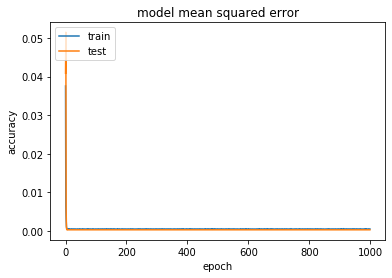

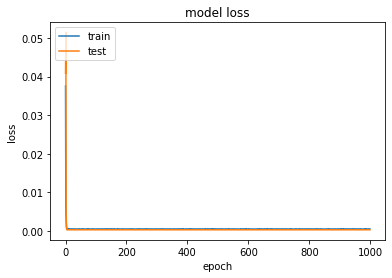

In [30]:
#plot mean squared error and loss of the model
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
#evaluate: evaluating the already trained model using the validation (or test) data and the corresponding labels.
#returns the loss value and metrics values for the model.
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, trainX, trainY , testX, testY)

Train Score: 0.00005 MSE (0.01 RMSE)
Test Score: 0.00030 MSE (0.02 RMSE)


(4.8958988360698095e-05, 0.00030415038516198357)

In [32]:
#inverse transforming the scaled vector earlier and checking for the error visually in the graph
#predict: we want to use this model to do some feed-forward passes to predict novel inputs
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
pred[:10]

array([[147.07268],
       [148.07065],
       [151.41681],
       [153.98671],
       [154.10335],
       [154.09286],
       [155.56815],
       [156.45296],
       [156.12903],
       [153.28236]], dtype=float32)

In [33]:
testY = testY.reshape(testY.shape[0] , 1)
testY = scaler.inverse_transform(testY)
testY[:10]

array([[148.96],
       [153.01],
       [153.99],
       [153.26],
       [153.95],
       [156.1 ],
       [155.7 ],
       [155.47],
       [150.25],
       [152.54]], dtype=float32)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


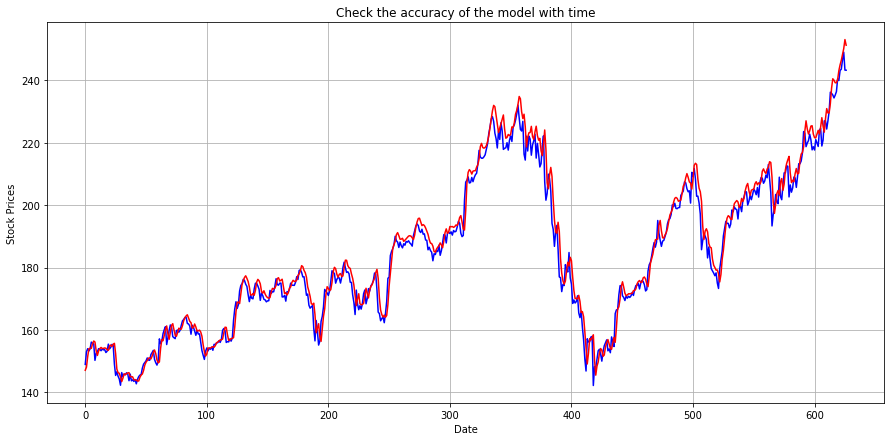

In [34]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()